In [1]:
import requests 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Загрузка данных

Возьмем данные о численности населения субъектов Российской Федерации по состоянию на 1 января 2024 года

In [2]:
url = 'https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D1%83%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B9_%D0%A4%D0%B5%D0%B4%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8'

In [3]:
a = pd.read_html(url)

In [4]:
a[0].columns

Index(['№', 'Субъект РФ', 'Всё населе- ние, чел', '% от общ. населе- ния РФ',
       'Городское население, чел.[3]', '%', 'Сельское население, чел.[3]',
       '%.1', 'Пло- щадь, км²[2]', 'Плотность населения, чел/км²', 'ФО'],
      dtype='object')

In [5]:
df = a[0][['Субъект РФ', 'Всё населе- ние, чел', 'Городское население, чел.[3]', 'Сельское население, чел.[3]', 'Пло- щадь, км²[2]', 'Плотность населения, чел/км²', 'ФО']]

In [6]:
df.head(10)

,Субъект РФ,"Всё населе- ние, чел","Городское население, чел.[3]","Сельское население, чел.[3]","Пло- щадь, км²[2]","Плотность населения, чел/км²",ФО
0,Москва,↗13 149 803,13 015 126,0,2561,513464,ЦФО
1,Московская область,↗8 651 260,6 703 233,1 839 024,44 329,19516,ЦФО
2,Краснодарский край,↗5 833 002,3 322 319,2 509 723,75 485,7727,ЮФО
3,Санкт-Петербург,↘5 597 763,5 607 916,0,1403,398985,СЗФО
4,Свердловская область,↘4 222 695,3 658 528,605 163,194 307,2173,УФО
5,Ростовская область,↘4 152 518,2 845 433,1 346 889,100 967,4113,ЮФО
6,Республика Башкортостан,↘4 064 361,2 539 327,1 552 294,142 947,2843,ПФО
7,Республика Татарстан,↗4 003 016,3 070 915,929 169,67 847,5900,ПФО
8,Тюменская область (с ХМАО и ЯНАО),↗3 890 800,3 093 855,733 824,1 464 173,266,УФО
9,Челябинская область,↘3 395 798,2 826 740,594 816,88 529,3836,УФО


#### Очистка данных

In [7]:
df.rename(columns={'Субъект РФ':'Регион', 
                   'Всё населе- ние, чел':'Всё население', 
                   'Городское население, чел.[3]': 'Городское население',
                   'Сельское население, чел.[3]' : 'Сельское население',
                   'Пло- щадь, км²[2]' : 'Площадь',
                   'Плотность населения, чел/км²': 'Плотность населения'
                  }, inplace=True)

In [8]:
df['Всё население'] = df['Всё население'].str.strip('↗↘ ') 
df['Всё население'] = df['Всё население'].str.replace(u'\xa0', '')
df['Городское население'] = df['Городское население'].str.replace(u'\xa0', '')
df['Сельское население'] = df['Сельское население'].str.replace(u'\xa0', '')
df['Площадь'] = df['Площадь'].str.replace(u'\xa0', '')

In [9]:
df.dtypes

Регион                 object
Всё население          object
Городское население    object
Сельское население     object
Площадь                object
Плотность населения     int64
ФО                     object
dtype: object

In [10]:
df['Всё население'] = df['Всё население'].astype('int')
df['Городское население'] = df['Городское население'].astype('int')
df['Сельское население'] = df['Сельское население'].astype('int')
df['Площадь'] = df['Площадь'].astype('int')

In [11]:
df.head(10)

,Регион,Всё население,Городское население,Сельское население,Площадь,Плотность населения,ФО
0,Москва,13149803,13015126,0,2561,513464,ЦФО
1,Московская область,8651260,6703233,1839024,44329,19516,ЦФО
2,Краснодарский край,5833002,3322319,2509723,75485,7727,ЮФО
3,Санкт-Петербург,5597763,5607916,0,1403,398985,СЗФО
4,Свердловская область,4222695,3658528,605163,194307,2173,УФО
5,Ростовская область,4152518,2845433,1346889,100967,4113,ЮФО
6,Республика Башкортостан,4064361,2539327,1552294,142947,2843,ПФО
7,Республика Татарстан,4003016,3070915,929169,67847,5900,ПФО
8,Тюменская область (с ХМАО и ЯНАО),3890800,3093855,733824,1464173,266,УФО
9,Челябинская область,3395798,2826740,594816,88529,3836,УФО


In [12]:
df = df.set_index('Регион')

In [13]:
df = df.drop(['Ханты-Мансийский автономный округ — Югра', 'Тюменская область без ХМАО и ЯНАО', 'Архангельская область без НАО', 'Ямало-Ненецкий автономный округ', 'Ненецкий автономный округ', 'РФ'], axis=0)

In [14]:
df.reset_index(inplace=True)

In [15]:
df.isna().sum()

Регион                 0
Всё население          0
Городское население    0
Сельское население     0
Площадь                0
Плотность населения    0
ФО                     0
dtype: int64

In [16]:
df['Всё население(млн.)'] = (df['Всё население']/1000000).round(1)
df['Городское население(млн.)'] = (df['Городское население']/1000000).round(1)
df['Сельское население(млн.)'] = (df['Сельское население']/1000000).round(2)
df['Площадь(тыс.км²)'] = (df['Площадь']/1000).round(1)

In [17]:
df.head(10)

,Регион,Всё население,Городское население,Сельское население,Площадь,Плотность населения,ФО,Всё население(млн.),Городское население(млн.),Сельское население(млн.),Площадь(тыс.км²)
0,Москва,13149803,13015126,0,2561,513464,ЦФО,13.1,13.0,0.00,2.6
1,Московская область,8651260,6703233,1839024,44329,19516,ЦФО,8.7,6.7,1.84,44.3
2,Краснодарский край,5833002,3322319,2509723,75485,7727,ЮФО,5.8,3.3,2.51,75.5
3,Санкт-Петербург,5597763,5607916,0,1403,398985,СЗФО,5.6,5.6,0.00,1.4
4,Свердловская область,4222695,3658528,605163,194307,2173,УФО,4.2,3.7,0.61,194.3
5,Ростовская область,4152518,2845433,1346889,100967,4113,ЮФО,4.2,2.8,1.35,101.0
6,Республика Башкортостан,4064361,2539327,1552294,142947,2843,ПФО,4.1,2.5,1.55,142.9
7,Республика Татарстан,4003016,3070915,929169,67847,5900,ПФО,4.0,3.1,0.93,67.8
8,Тюменская область (с ХМАО и ЯНАО),3890800,3093855,733824,1464173,266,УФО,3.9,3.1,0.73,1464.2
9,Челябинская область,3395798,2826740,594816,88529,3836,УФО,3.4,2.8,0.59,88.5


#### Построение графиков

In [18]:
df2 = df[['Регион','Всё население(млн.)', 'Городское население(млн.)', 'Сельское население(млн.)']].sort_values(by='Всё население(млн.)', ascending=False).reset_index()

Посмотрим на все население России в разбивке по регионам:

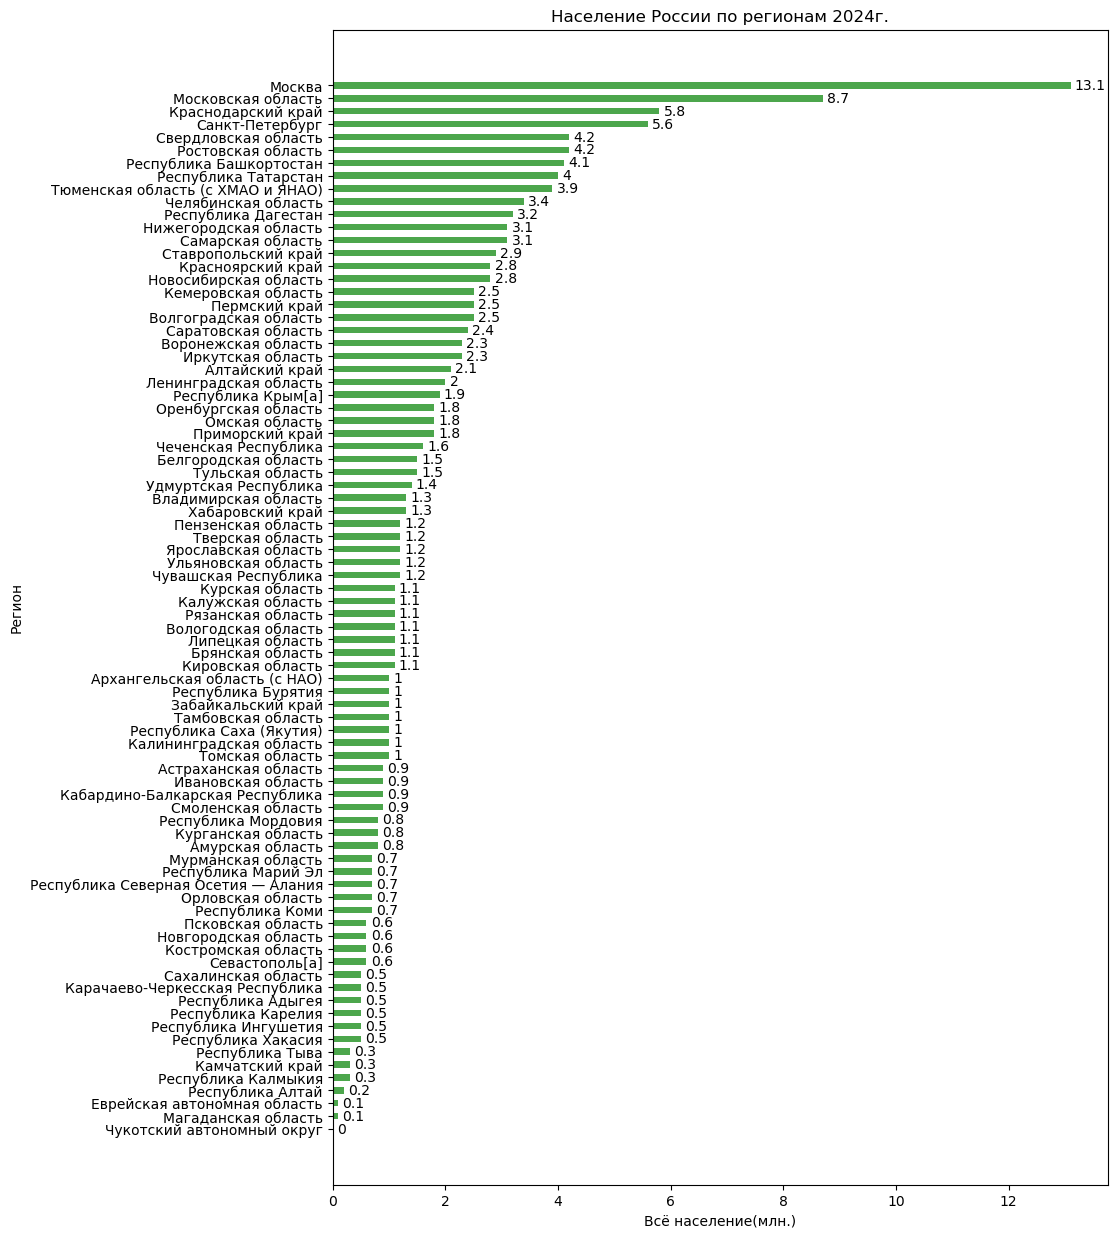

In [19]:
plt.figure(figsize=(10, 15))

ax = plt.barh(df2['Регион'].sort_index(ascending=False), df2['Всё население(млн.)'].sort_index(ascending=False), 
        height=0.5, color='green', alpha=0.7)
plt.title('Население России по регионам 2024г.')
plt.xlabel('Всё население(млн.)')
plt.ylabel('Регион')
plt.bar_label(ax, padding=3)

plt.show()

Посмотрим соотношение городского и сельского населения по каждому региону:

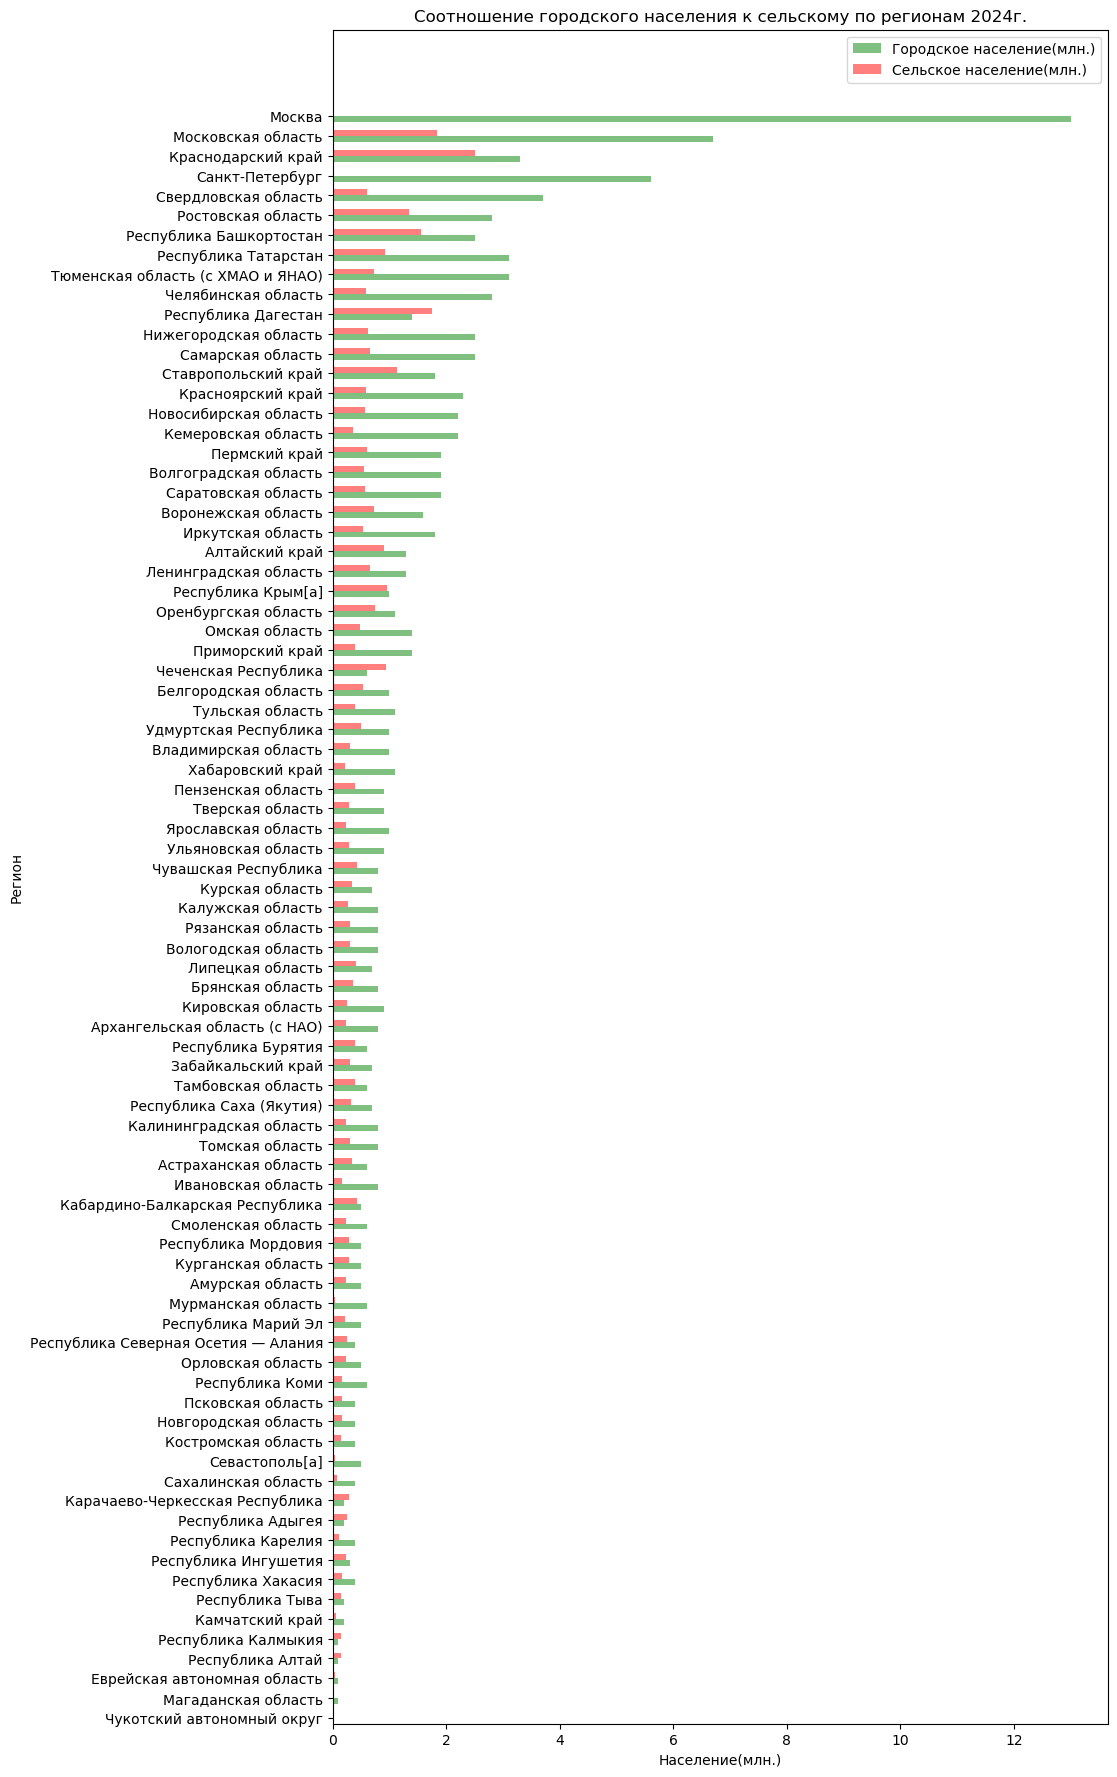

In [20]:
plt.figure(figsize=(10, 22))

h = 0.15
x = df.index.values

ax1 = plt.barh(x-h, df2['Городское население(млн.)'].sort_index(ascending=False), 
        height=h*2, color='green', alpha=0.5)

ax2 = plt.barh(x+h, df2['Сельское население(млн.)'].sort_index(ascending=False), 
        height=h*2, color='red', alpha=0.5)

plt.title('Соотношение городского населения к сельскому по регионам 2024г.')
plt.xlabel('Население(млн.)')
plt.ylabel('Регион')
plt.legend(['Городское население(млн.)', 'Сельское население(млн.)'])
plt.yticks(ticks=x, labels=df2['Регион'].sort_index(ascending=False))
plt.ylim(-0.3)
plt.show()

Выведем то же самое что и на преыдущем графике, но в другом виде:

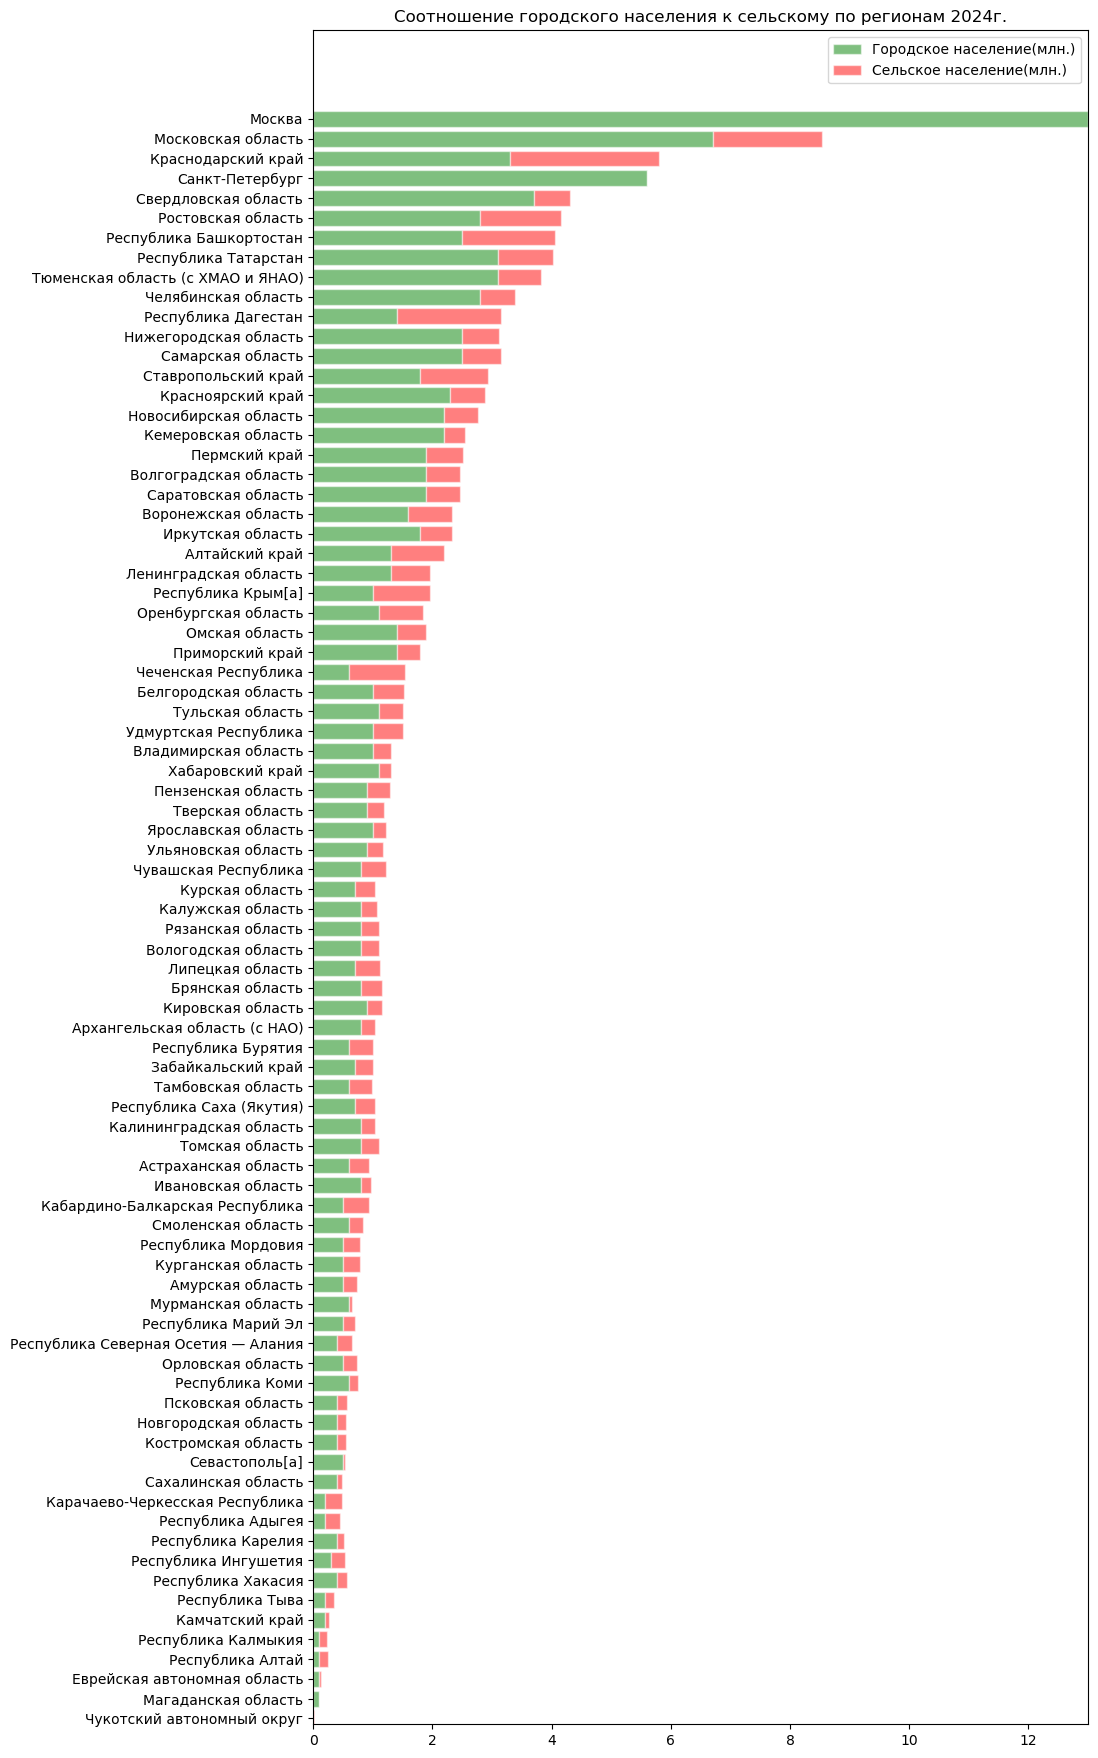

In [21]:
plt.figure(figsize=(10, 22))
N = len(df2['Регион'])
r = range(N)

bars1 = df2['Городское население(млн.)'].sort_index(ascending=False)
bars2 = df2['Сельское население(млн.)'].sort_index(ascending=False)
bars3 = df2['Всё население(млн.)'].sort_index(ascending=False)
colors = ['green', 'red']
labels = ["Городское население(млн.)", "Сельское население(млн.)"]

barWidth = 0.8
lefts = 0


for bars, col, label, bb in zip([bars1, bars2], colors, labels, bars3):
    a=plt.barh(r, bars, left=lefts, color=col, edgecolor='white', height=barWidth, label=label, alpha=0.5)
    lefts += bars
plt.title('Соотношение городского населения к сельскому по регионам 2024г.')
plt.legend()
plt.yticks(ticks=x, labels=df2['Регион'].sort_index(ascending=False))
plt.ylim(-0.3)
plt.show()

Посмотрим на размер занимаемой площади в разбивке по регионам:

In [22]:
df3 = df[['Регион','Площадь(тыс.км²)']].sort_values(by='Площадь(тыс.км²)', ascending=False).reset_index()

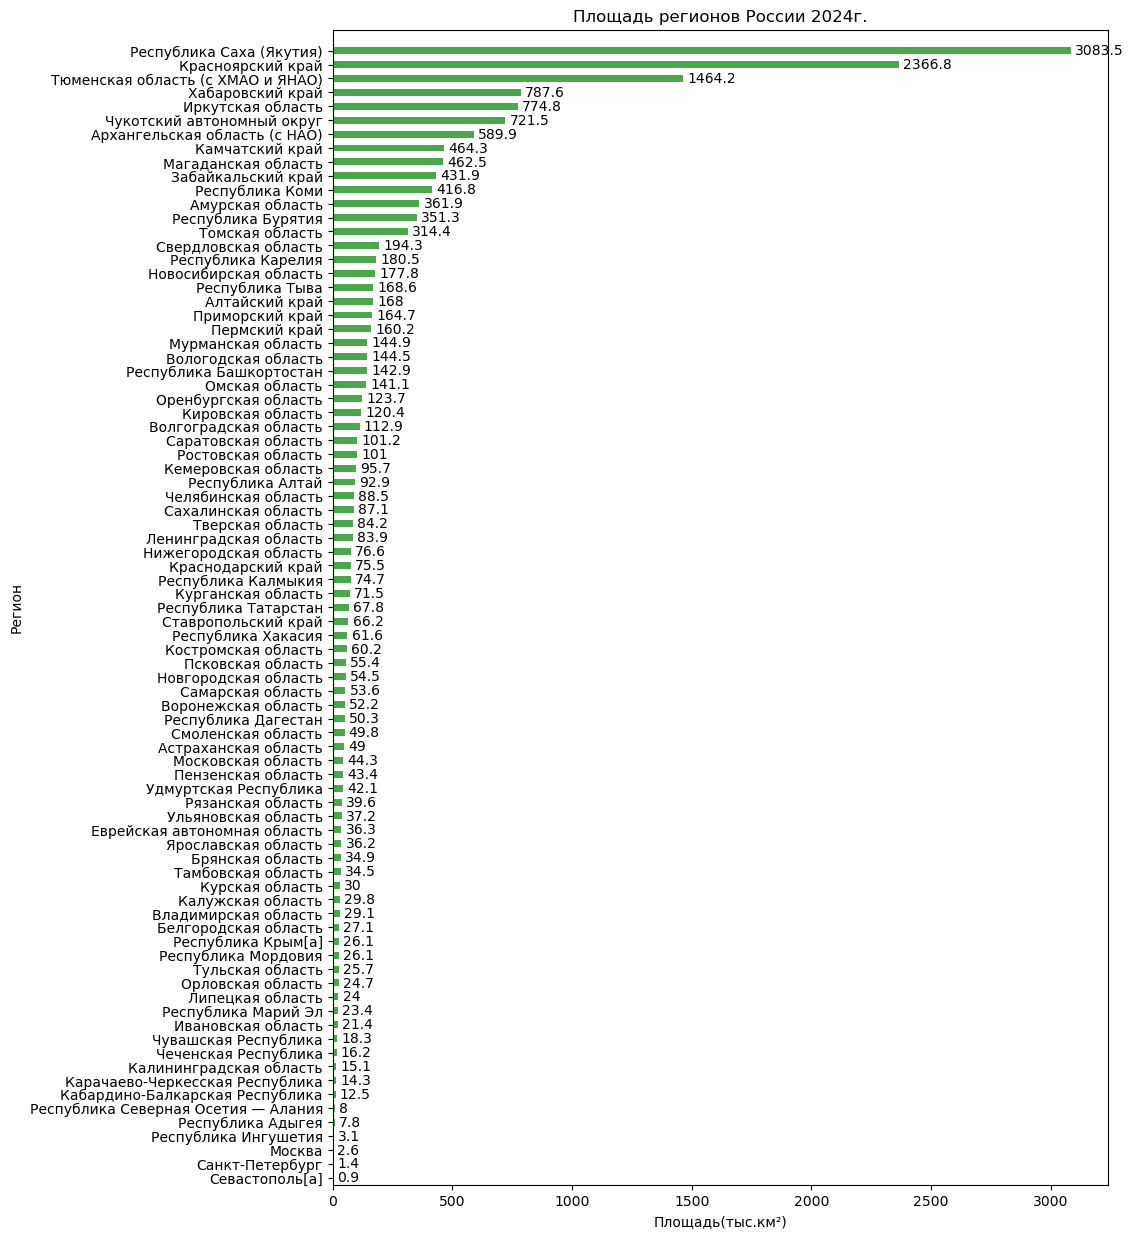

In [23]:
plt.figure(figsize=(10, 15))

ax = plt.barh(df3['Регион'].sort_index(ascending=False), df3['Площадь(тыс.км²)'].sort_index(ascending=False), 
        height=0.5, color='green', alpha=0.7)
plt.title('Площадь регионов России 2024г.')
plt.xlabel('Площадь(тыс.км²)')
plt.ylabel('Регион')
plt.bar_label(ax, padding=3)
plt.ylim(-0.5,len(df3)+0.5)
plt.show()

Далее посмотрим некоторые показатели в разрезе Федеральных округов:

In [24]:
df3 = df[['ФО','Всё население(млн.)', 'Городское население(млн.)', 'Сельское население(млн.)', 'Площадь(тыс.км²)', 'Плотность населения']].groupby('ФО').sum()
df3.reset_index(inplace=True)

Население и площадь по Федеральным округам:

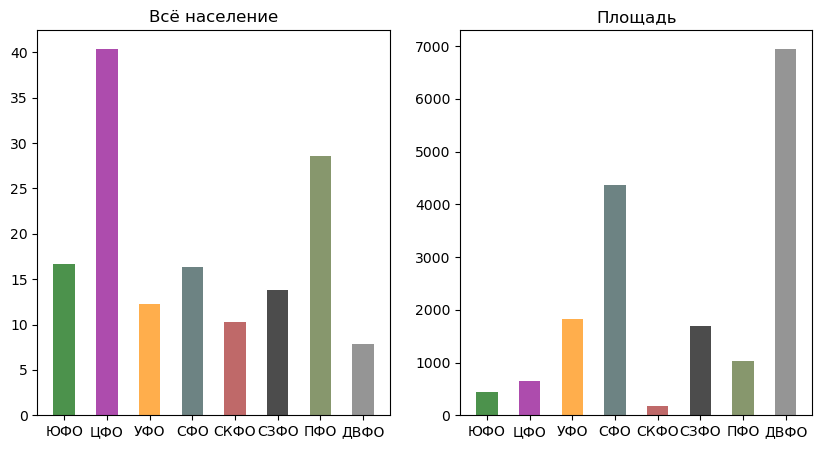

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(df3['ФО'].sort_index(ascending=False), df3['Всё население(млн.)'].sort_index(ascending=False), 
        width=0.5, color=["#006400", "#8B008B", "#FF8C00", "#2F4F4F", "#A52A2A", "#000000", "#556B2F", "#696969"], alpha=0.7)
ax2.bar(df3['ФО'].sort_index(ascending=False), df3['Площадь(тыс.км²)'].sort_index(ascending=False), 
        width=0.5, color=["#006400", "#8B008B", "#FF8C00", "#2F4F4F", "#A52A2A", "#000000", "#556B2F", "#696969"], alpha=0.7)
ax1.set_title('Всё население')
ax2.set_title('Площадь')
plt.show()

Плотность населения:

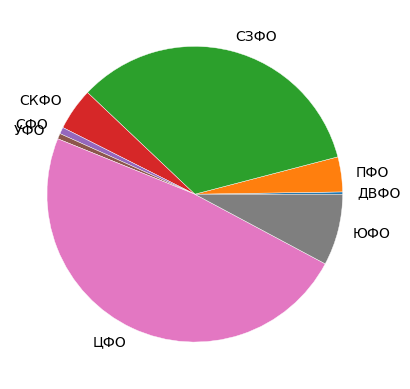

In [26]:
plt.pie(df3['Плотность населения'],
        labels=df3['ФО'],
        wedgeprops={'edgecolor': 'w', 'linewidth': 0.3})

plt.show()